In [11]:
import pandas as pd                  
import numpy as np                     
import matplotlib.pyplot as plt        
from sklearn.model_selection import train_test_split  
from sklearn.preprocessing import StandardScaler     
import tensorflow as tf         
import seaborn as sns
from tensorflow.keras.models import Sequential      
from tensorflow.keras.layers import LSTM, Dense   

In [12]:
df = pd.read_csv("../dataset/abalone.csv",index_col=0)

In [13]:
# 데이터 확인
df

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
id,,,,,,,,,
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9


In [14]:
# 컬렴명 확인
df.columns

Index(['Sex', 'Length', 'Diameter', 'Height', 'Whole_weight', 'Shucked_weight',
       'Viscera_weight', 'Shell_weight', 'Rings'],
      dtype='object')

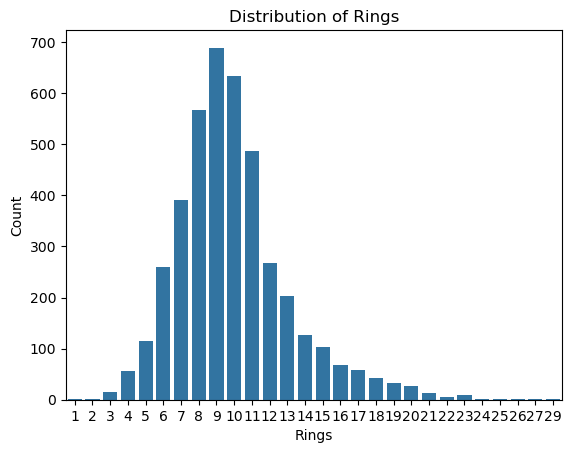

In [15]:
# 데이터 시각화: Rings 분포
sns.countplot(data=df, x="Rings")
plt.title('Distribution of Rings')
plt.xlabel('Rings')
plt.ylabel('Count')
plt.show()

In [22]:
# 결측치 확인
(df == 0).sum()

Sex               0
Length            0
Diameter          0
Height            2
Whole_weight      0
Shucked_weight    0
Viscera_weight    0
Shell_weight      0
Rings             0
dtype: int64

In [24]:
# 결측치 제거
# Outcome 열을 제외한 나머지 열에서 0이 포함된 행을 제거
df = df[(df!= 0).all(axis=1)]

# 결과 출력
print(df.shape)  # 0 값이 제거된 후의 데이터 크기 확인

(4175, 9)


In [26]:
# Sex 값을 F -> 0, M -> 1로 변환
df['Sex'] = df['Sex'].replace({'F': 0, 'M': 1, 'I':2})

/var/folders/nr/9d9y7mfn50b3sc_ncv28vstc0000gn/T/ipykernel_19388/377919716.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Sex'] = df['Sex'].replace({'F': 0, 'M': 1, 'I':2})
/var/folders/nr/9d9y7mfn50b3sc_ncv28vstc0000gn/T/ipykernel_19388/377919716.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Sex'] = df['Sex'].replace({'F': 0, 'M': 1, 'I':2})


In [43]:
X = df.drop('Rings', axis=1).values
y = df['Rings'].values
y_adjusted = y - 1 

# X 데이터 정규화
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [45]:
# 데이터셋을 학습 및 테스트 세트로 분할
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# 입력 데이터 차원 변경 (LSTM에 맞게)
X_train = X_train[:, :, np.newaxis]  # (샘플 수, 피처 수, 1)
X_test = X_test[:, :, np.newaxis]

In [47]:
# LSTM 모델 구축
model = Sequential()
model.add(LSTM(64, input_shape=(X_train.shape[1], 1)))  # LSTM 레이어 추가
model.add(Dense(1))  # 회귀이므로 출력 뉴런 수는 1

# 모델 컴파일
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [53]:
# 모델 학습
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.2)

Epoch 1/20
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 5.8499 - mae: 1.7306 - val_loss: 4.6925 - val_mae: 1.5784
Epoch 2/20
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5.4602 - mae: 1.6720 - val_loss: 4.5892 - val_mae: 1.5609
Epoch 3/20
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5.5751 - mae: 1.6781 - val_loss: 4.4967 - val_mae: 1.5333
Epoch 4/20
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5.3675 - mae: 1.6589 - val_loss: 4.3879 - val_mae: 1.4958
Epoch 5/20
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.7763 - mae: 1.5543 - val_loss: 4.2953 - val_mae: 1.4981
Epoch 6/20
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.8307 - mae: 1.5675 - val_loss: 4.2212 - val_mae: 1.4890
Epoch 7/20
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5.0150 - mae: 1.6034 - val_loss: 4.2660 - val_mae: 1.5422
Epoch 8/20
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.7002 - mae: 1.5621 - val_loss: 4.1265 - val_mae: 1.4834
Epoch 9/20
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.7395 - mae: 

In [55]:
# 모델 평가
loss, mae = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss}, Test MAE: {mae}')

27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 784us/step - loss: 5.0325 - mae: 1.5597
Test Loss: 4.856044292449951, Test MAE: 1.5604788064956665


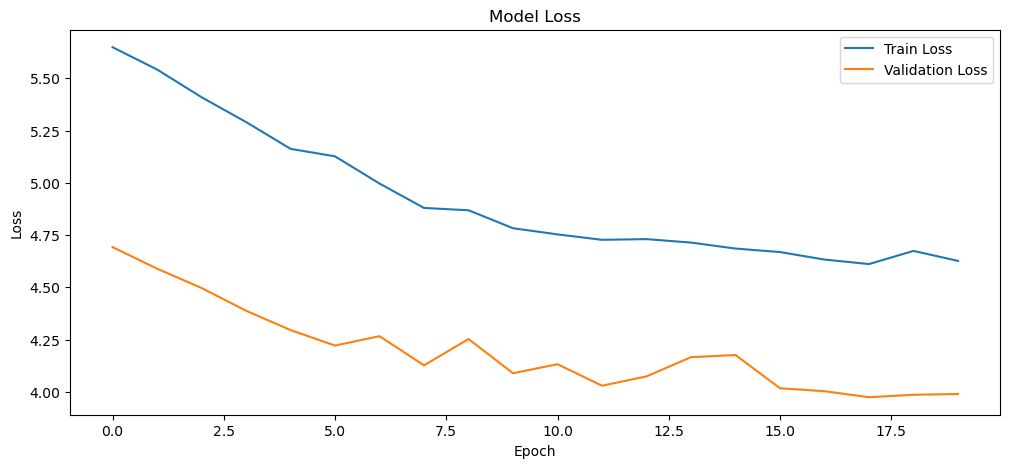

27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


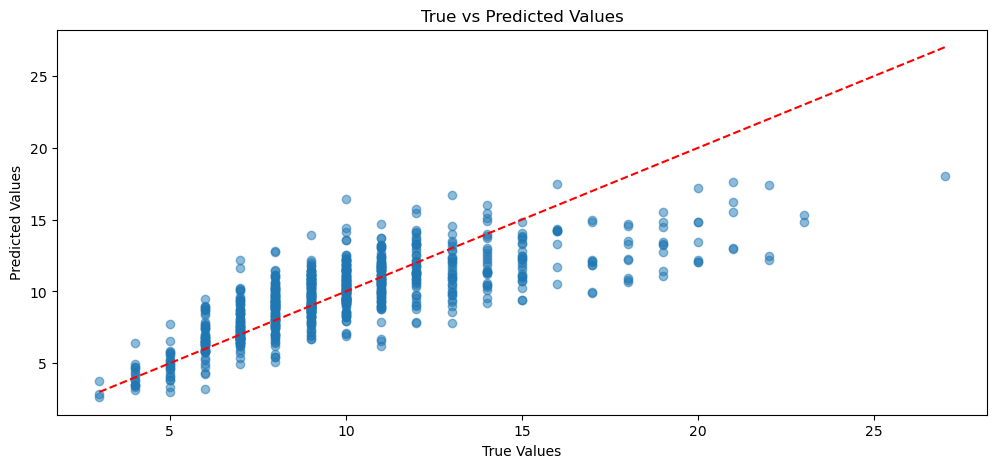

In [57]:
# 손실 시각화
plt.figure(figsize=(12, 5))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

# 예측 결과 시각화
y_pred = model.predict(X_test)

plt.figure(figsize=(12, 5))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--')  # y=x 선
plt.title('True vs Predicted Values')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.show()